In [56]:
import pandas as pd
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

In [57]:
data = pd.read_csv('BOD_biclass_139rdkit.csv')

In [58]:
data.head()

,SMILES,bod_class,exactmw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeteroatoms,NumAmideBonds,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,CCC1(C(=O)NC(=O)NC1=O)c2ccccc2,0,232.084792,5.0,2.0,2.0,2.0,3.0,5.0,4.0,...,0,0,0,2,0,0,0,0,0,0
1,CC(O)C(O)=O,1,90.031694,3.0,2.0,1.0,2.0,2.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl,0,351.914689,0.0,0.0,2.0,0.0,0.0,5.0,0.0,...,0,0,0,2,0,0,0,0,0,0
3,OC(=O)c1c(Cl)ccc(Cl)c1Cl,1,223.919862,2.0,1.0,1.0,1.0,1.0,5.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,OCC(O)C(O)C(O)C(O)CO,1,182.079038,6.0,6.0,5.0,6.0,6.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
data.shape

(1063, 141)

In [60]:
data_139 = data.iloc[:,2:141]
data_139.shape

(1063, 139)

In [61]:
data_train = data_139.as_matrix()
data_train.shape

C:\Users\yychen\Miniconda3\envs\deepchembed\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(1063, 139)

In [62]:
def autoencoder(dims, final_nodes, act='relu'):
    """
    Fully connected auto-encoder model, symmetric.
    Arguments:
        dims: a list contains the node numbers in each layer of encoder. The decoder is symmetric with encoder. 
        So number of layers of the auto-encoder is 2*len(dims)-1
        act: activation function
        final_nodes: the final target dimension for dimension reduction, which interconnects the encoder and decoder
    return:
        Model of autoencoder
    """
    n_stacks = len(dims) - 1
    # input
    x = Input(shape=(dims[0],), name='input')
    h = x

    # internal layers in encoder
    for i in range(n_stacks-1):
        h = Dense(dims[i + 1], activation=act, name='encoder_%d' % i)(h)

    # inter-connected layer between encoder and decoder
    h = Dense(final_nodes, name='encoder_%d' % (n_stacks - 1))(h)  #features are extracted from here

    # internal layers in decoder
    for i in range(n_stacks-1, 0, -1):
        h = Dense(dims[i], activation=act, name='decoder_%d' % i)(h)

    # output
    h = Dense(dims[0], name='decoder_0')(h)

    return Model(inputs=x, outputs=h)

Build and compile a 4 layers autoencoder model, the final_nodes are set to 5 here

In [63]:
dim = np.linspace(139,5,4,dtype = int)
dim

array([139,  94,  49,   5])

In [64]:
final_nodes = 5

In [65]:
autoencoder = autoencoder (dim, final_nodes)

In [66]:
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

In [67]:
history = autoencoder.fit(data_train,data_train,epochs= 50,batch_size=256,shuffle=True)

Epoch 1/50
1063/1063 [==============================] - 1s 1ms/step - loss: -24.2985
Epoch 2/50
1063/1063 [==============================] - 0s 38us/step - loss: -55.1202
Epoch 3/50
1063/1063 [==============================] - 0s 39us/step - loss: -60.0840
Epoch 4/50
1063/1063 [==============================] - 0s 36us/step - loss: -60.5487
Epoch 5/50
1063/1063 [==============================] - 0s 38us/step - loss: -63.2976
Epoch 6/50
1063/1063 [==============================] - 0s 45us/step - loss: -62.9389
Epoch 7/50
1063/1063 [==============================] - 0s 41us/step - loss: -63.2358
Epoch 8/50
1063/1063 [==============================] - 0s 41us/step - loss: -63.9990
Epoch 9/50
1063/1063 [==============================] - 0s 43us/step - loss: -63.9462
Epoch 10/50
1063/1063 [==============================] - 0s 41us/step - loss: -64.1878
Epoch 11/50
1063/1063 [==============================] - 0s 40us/step - loss: -64.4639
Epoch 12/50
1063/1063 [==============================

In [68]:
print(history.history.keys())

dict_keys(['loss'])


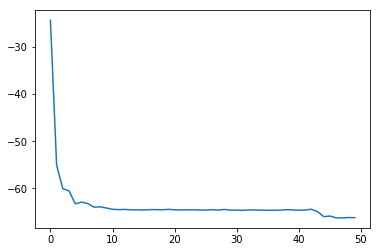

In [69]:
plt.plot(history.history['loss'])